In [3]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import json

In [4]:
with open('sol.json', 'r') as file:
    ans = json.load(file)

In [18]:
ans[0]
#J_1, d, X, Y, mu, P

[0, 0.0, [0.1502032866036876, 0.0320138999473882, -1.0246199796052329, 0.0]]

In [14]:
def epsilon_P(X, Y, k_x, k_y, J_1):    #E_k is a 1D matrix of size N 
    e1 = 0
    e2 = 0
    e1 = -8*X*J*(np.cos(k_x*a)+np.cos((k_x*a/2)+(k_y*np.sqrt(3)*a/2))+np.cos((k_x*a/2)-(k_y*np.sqrt(3)*a/2)))
    e2 = -8*Y*J_1*(np.cos(k_y*a*np.sqrt(3))+np.cos((3*k_x*a/2)-(k_y*np.sqrt(3)*a/2))+np.cos((-3*k_x*a/2)-(k_y*np.sqrt(3)*a/2)))
    E_k= e1+e2
    return (E_k)

In [25]:
def plotter(ans, values):
    E = []
    a = 1
    J = 1
    for val in values:
        J_1 = val[0]
        d   = val[1]
        for i in ans:
            if (i[0]==J_1 and i[1]==d):
                X = i[2][0]
                Y = i[2][1]
                mu = i[2][2]
                P = i[2][3]
        GM_x =np.linspace(0, np.pi, 20)
        GM_y =GM_x/np.sqrt(3)
    
        MK_x =np.linspace(np.pi, 4*np.pi/3, 20)
        MK_y = -np.sqrt(3)*(MK_x-4*np.pi/3)

        KM_x =np.linspace(0, 4*np.pi/3, 20)
        KM_y =np.zeros(len(KM_x))
        
        E_GM = epsilon_P(X, Y, GM_x, GM_y, J_1)
        E_MK = epsilon_P(X, Y, MK_x, MK_y, J_1)
        E_KM = epsilon_P(X, Y, KM_x[::-1], KM_y, J_1)
    
        A = np.append(E_GM, E_MK)
        E1 = np.append(A, E_KM)  
        E.append([round(J_1,4), round(d,4), E1])
     
    return(E)
        

In [42]:
def disp(E):
    plt.figure(figsize =(12,8) )
    for i in E:
        J_1 = i[0]
        d   = i[1]
        x = np.linspace(0, len(i[2]), len(i[2]))
        plt.plot(x,i[2], label=f'$J\'/J$={J_1}, d={d}')
        plt.legend(loc='upper left')
    ax = plt.gca()
    ax.xaxis.set_ticks([0, 19, 39, 59])
    ax.xaxis.set_ticklabels(['$\Gamma$','M', 'K','$\Gamma$'])
    plt.ylabel(r'$ E $', fontsize = 15)
    plt.gca().yaxis.label.set(rotation='horizontal', ha='right');
        

In [53]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_3d_surface(x, y, z, title, xlabel='k_x', ylabel='k_y', zlabel='E'):
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(x, y, z, cmap='viridis')

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.set_title(title)
    
    #ax.view_init(elev=50, azim=50)

    plt.show()

def plot_2d_heatmap(x, y, z, xlabel='k_x', ylabel='k_y', title='E', figsize=(9, 7), cmap='viridis'):
    
    plt.figure(figsize=figsize)
    
    # Using pcolormesh
    heatmap = plt.pcolormesh(x, y, z, shading='auto', cmap=cmap)
    
    plt.colorbar(heatmap)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    plt.show()


In [38]:
ratio = sorted(list({sol[0] for sol in ans}))
delta = sorted(list({sol[1] for sol in ans}))

In [45]:
ratio

[0, 0.01, 0.05, 0.075, 0.1, 0.125]

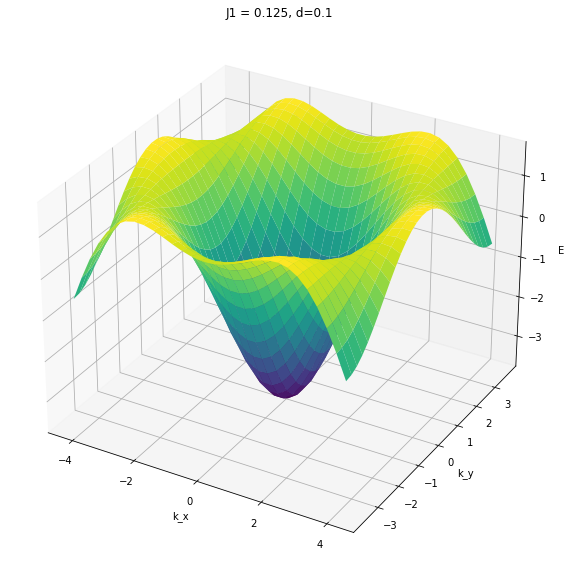

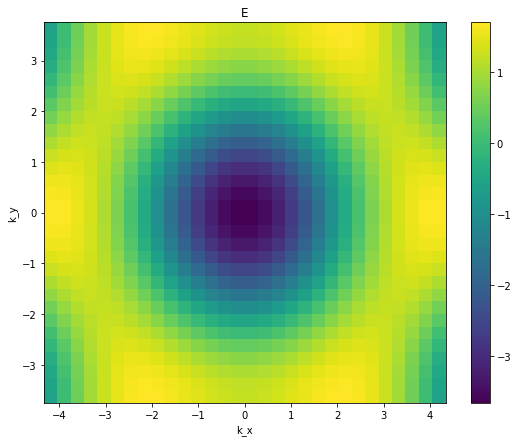

In [55]:
x = np.linspace(-4*np.pi/3, 4*np.pi/3, 30)
y = np.linspace(-2*np.pi/np.sqrt(3), 2*np.pi/np.sqrt(3), 30)
x, y = np.meshgrid(x, y)

J_1 = 0.125
d = 0.1
a = 1
J = 1

for i in ans:
    if (i[0]==J_1 and i[1]==d):
        X = i[2][0]
        Y = i[2][1]
        mu = i[2][2]
        P = i[2][3]

z = epsilon_P(X, Y, x, y, J_1)

plot_3d_surface(x, y, z, f'J1 = {J_1}, d={d}')
plot_2d_heatmap(x,y,z)

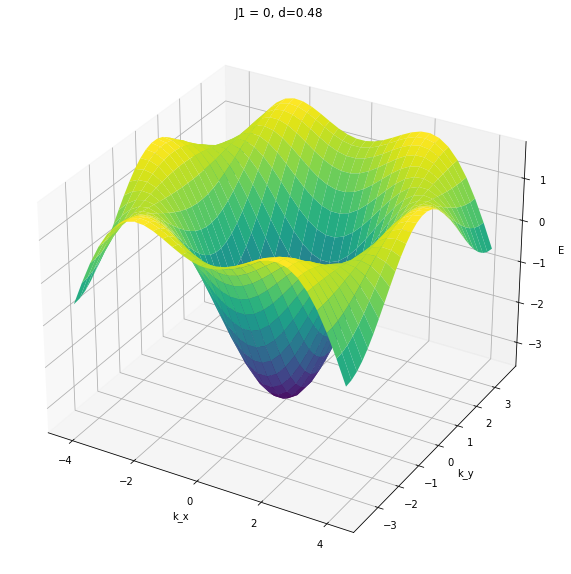

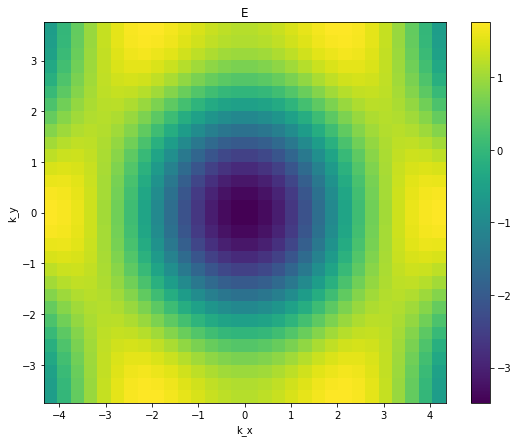

In [56]:
x = np.linspace(-4*np.pi/3, 4*np.pi/3, 30)
y = np.linspace(-2*np.pi/np.sqrt(3), 2*np.pi/np.sqrt(3), 30)
x, y = np.meshgrid(x, y)

J_1 = 0
d = 0.48
a = 1
J = 1

for i in ans:
    if (i[0]==J_1 and i[1]==d):
        X = i[2][0]
        Y = i[2][1]
        mu = i[2][2]
        P = i[2][3]

z = epsilon_P(X, Y, x, y, J_1)

plot_3d_surface(x, y, z, f'J1 = {J_1}, d={d}')
plot_2d_heatmap(x,y,z)

In [12]:
delta

[0.0, 0.01, 0.05, 0.075, 0.1, 0.48, 0.86, 1.2400000000000002, 1.62, 2.0]

In [13]:
ratio

[0, 0.01, 0.05, 0.075, 0.1, 0.125]

In [57]:
ans

[[0, 0.0, [0.1502032866036876, 0.0320138999473882, -1.0246199796052329, 0.0]],
 [0, 0.0, [0.1502032866036876, 0.0320138999473882, -1.0246199796052329, 0.0]],
 [0, 0.0, [0.1502032866036876, 0.0320138999473882, -1.0246199796052329, 0.0]],
 [0, 0.0, [0.1502032866036876, 0.0320138999473882, -1.0246199796052329, 0.0]],
 [0,
  0.1,
  [0.15001938043132482, 0.031897224539577274, -1.024804043093492, 0.0]],
 [0,
  0.075,
  [0.15010021230324946, 0.03194838174043309, -1.0247185708209532, 0.0]],
 [0,
  0.05,
  [0.1501577754037371, 0.03198488080338498, -1.0246576459670032, 0.0]],
 [0, 0.48, [0.146582352276021, 0.02964955716682184, -1.0200750472417173, 0.0]],
 [0,
  0.86,
  [0.14100611504648702, 0.024810100480843922, -0.9182284231413058, 0.0]],
 [0,
  1.2400000000000002,
  [0.13946595867799982, 0.025541950717249837, -1.2905591487134713, 0.0]],
 [0,
  1.62,
  [0.14760374841973836, 0.006028958286889741, -1.5054162747506192, 0.0]],
 [0, 2.0, [-0.08297154176750336, 0.02928999851078876, -2.0, 0.0]],
 [0,
